In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/diabetes.csv')
df.shape

(768, 9)

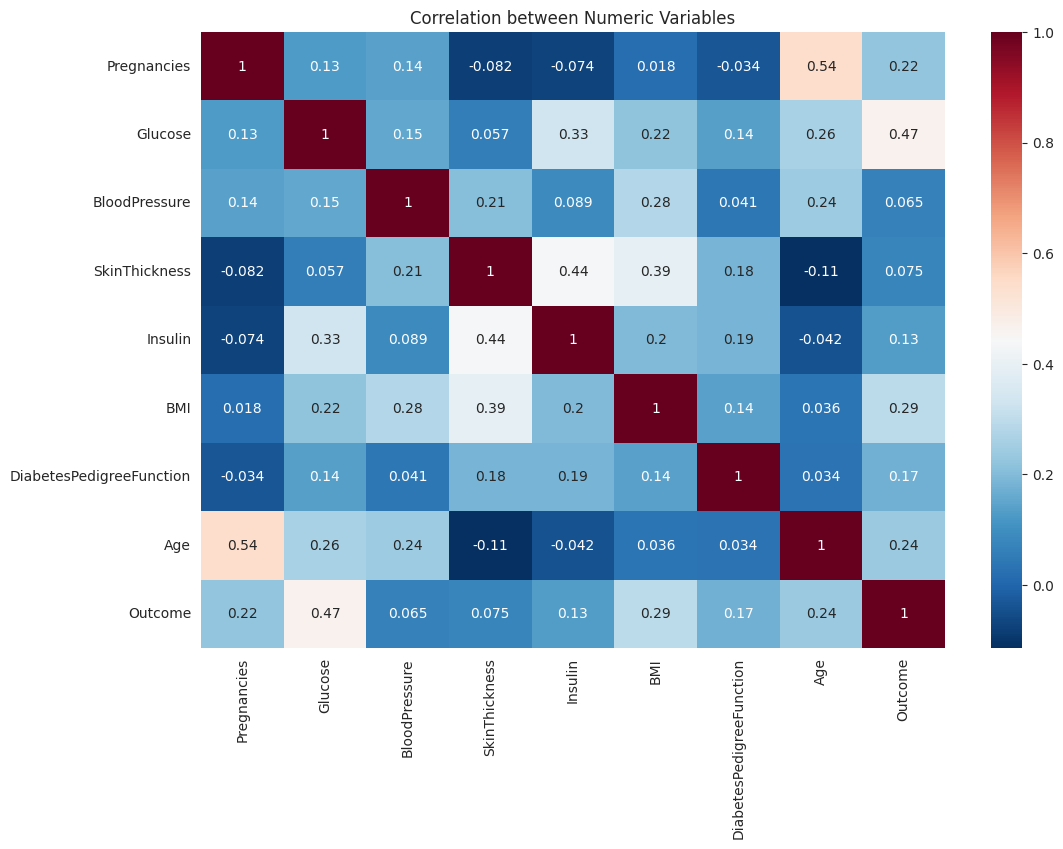

In [23]:
corr_pearson = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_pearson, cmap="RdBu_r", annot=True)

plt.title('Correlation between Numeric Variables')
plt.show()

In [24]:
df_feature = df.drop('Outcome', axis=1)
sr_outcome = df['Outcome']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(chi2, k=4)
chi2_selector.fit(df_feature, sr_outcome)

cols = chi2_selector.get_support(indices=True)
df_selected_features = df_feature.iloc[:, cols]

df_selected_features.head()

,Glucose,Insulin,BMI,Age
0,148,0,33.6,50
1,85,0,26.6,31
2,183,0,23.3,32
3,89,94,28.1,21
4,137,168,43.1,33


In [25]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

rfe = RFE(model_rf)
fit = rfe.fit(df_feature, sr_outcome)

print("Num Features: %s" % fit.n_features_)
print("Selected Features: %s" % fit.support_)

df_selected_features = df_feature.iloc[:,fit.support_]
df_selected_features.head()

Num Features: 4
Selected Features: [False  True False False False  True  True  True]


,Glucose,BMI,DiabetesPedigreeFunction,Age
0,148,33.6,0.627,50
1,85,26.6,0.351,31
2,183,23.3,0.672,32
3,89,28.1,0.167,21
4,137,43.1,2.288,33


In [26]:
model_rf = RandomForestClassifier()
model_rf.fit(df_feature, sr_outcome)
model_rf.feature_importances_

array([0.08408078, 0.25492369, 0.08929044, 0.06973953, 0.07181071,
       0.16338546, 0.12723013, 0.13953926])

In [27]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

model_lsvc = LinearSVC(C=0.01, penalty="l1", dual=False)
model_lsvc.fit(df_feature, sr_outcome)
sel_feature = SelectFromModel(model_lsvc, prefit=True)

df_selected_features = df_feature.iloc[:,sel_feature.get_support()]
df_selected_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6,148,72,35,0,33.6,50
1,1,85,66,29,0,26.6,31
2,8,183,64,0,0,23.3,32
3,1,89,66,23,94,28.1,21
4,0,137,40,35,168,43.1,33
